In [1]:
from sage.all import *

# 9.1

In [2]:
def factor_even_odd(n):
    """
    factorize n into 2^r*u, with u odd
    :return: (r, u)
    """
    if n % 2 or n == 0:
        return 0, n
    r = 0
    u = n
    while u % 2 == 0:
        r += 1
        u //= 2
    return r, u


def MR(N, a):
    r, u = factor_even_odd(N-1)
    ws = [pow(a, pow(2, s)*u, N) for s in range(r+1)]
    if not 1 in ws:
        #print("fermat failed")
        return False
    for i, j in zip(ws, ws[1:]):
        # TODO what is factor?
        if j == 1 and not (i == 1 or i == N-1):
            #print(f"spp failed, {i} mod {N}")
            return False
    return True

def fermat_test(N, a):
    r, u = factor_even_odd(N-1)
    ws = [pow(a, pow(2, s)*u, N) for s in range(r+1)]
    if not 1 in ws:
        #print("fermat failed")
        return False
    return True

def prime_test(N, a):
    print(f"{N = }", f"(prime: {is_prime(N)}), {a = }")
    print("Miller Rabin: ", MR(N, a))
    print("Fermat: ", fermat_test(N, a))
    print() 

In [3]:
prime_test(41, 2)
prime_test(57, 37)
prime_test(1105, 47)
prime_test(1105, 2)

N = 41 (prime: True), a = 2
Miller Rabin:  True
Fermat:  True

N = 57 (prime: False), a = 37
Miller Rabin:  False
Fermat:  True

N = 1105 (prime: False), a = 47
Miller Rabin:  True
Fermat:  True

N = 1105 (prime: False), a = 2
Miller Rabin:  False
Fermat:  True



In [21]:
N = 35
print(f"Fermat liars {N = }:", [a for a in range(1, N) if fermat_test(N, a)])

Fermat liars N = 35: [1, 6, 29, 34]


In [22]:
# 1, -1 mod N are always liars
N = 35
print(f"Miller Rabin liars {N = }:", [a for a in range(1, N) if MR(N, a)])

Miller Rabin liars N = 35: [1, 34]


In [4]:
N = 561
print(f"Fermat liars {N = }:", [a for a in range(1, N) if fermat_test(N, a)])

Fermat liars N = 561: [1, 2, 4, 5, 7, 8, 10, 13, 14, 16, 19, 20, 23, 25, 26, 28, 29, 31, 32, 35, 37, 38, 40, 41, 43, 46, 47, 49, 50, 52, 53, 56, 58, 59, 61, 62, 64, 65, 67, 70, 71, 73, 74, 76, 79, 80, 82, 83, 86, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 112, 113, 115, 116, 118, 122, 124, 125, 127, 128, 130, 131, 133, 134, 137, 139, 140, 142, 145, 146, 148, 149, 151, 152, 155, 157, 158, 160, 161, 163, 164, 166, 167, 169, 172, 173, 175, 178, 179, 181, 182, 184, 185, 188, 190, 191, 193, 194, 196, 197, 199, 200, 202, 203, 205, 206, 208, 211, 212, 214, 215, 217, 218, 223, 224, 226, 227, 229, 230, 232, 233, 235, 236, 239, 241, 244, 245, 247, 248, 250, 251, 254, 256, 257, 259, 260, 262, 263, 265, 266, 268, 269, 271, 274, 277, 278, 280, 281, 283, 284, 287, 290, 292, 293, 295, 296, 298, 299, 301, 302, 304, 305, 307, 310, 311, 313, 314, 316, 317, 320, 322, 325, 326, 328, 329, 331, 332, 334, 335, 337, 338, 343, 344, 346, 347, 349, 350, 353, 355, 356, 358, 359, 361, 362, 364,

In [5]:
len([a for a in range(1, N) if fermat_test(N, a)])

320

In [6]:
euler_phi(N)

320

In [24]:
N = 561
print(f"Miller Rabin liars {N = }:", [a for a in range(1, N) if MR(N, a)])

Miller Rabin liars N = 561: [1, 50, 101, 103, 256, 305, 458, 460, 511, 560]


In [40]:
N_MAX = 10000
numbers = list(range(3, N_MAX, 2))
numbers = [n for n in numbers if not is_prime(n)]
fermat_witness_counts = []
mr_witness_counts = []


for N in numbers:    
    fermat_witness_counts.append(sum(fermat_test(N, a) for a in range(2, N-1)))
    mr_witness_counts.append(sum(MR(N, a) for a in range(2, N-1)))

In [41]:
import matplotlib.pyplot as plt

plt.scatter(numbers, fermat_witness_counts, label="fermat")
plt.scatter(numbers, mr_witness_counts, label="MR")
plt.plot([0,N_MAX], [0, N_MAX//4], color="red", label="n/4")
plt.xlabel("n")
plt.ylabel("liar count")
plt.legend()
plt.show()

In [49]:
import pandas as pd

d = {"numbers": numbers, "fermat_liar_count": fermat_witness_counts, "mr_liar_count": mr_witness_counts}
df = pd.DataFrame(d)

# from: https://stackoverflow.com/questions/51826611/speed-up-a-search-for-carmichael-numbers
def is_carm(n):
    """ Check whether n is a Carmichael number """
    for b in range(2, n):
        # If b is relatively prime to n
        if gcd(b, n) == 1:
            # If pow(b, n-1) % n is not 1, not Carmichael
            if pow(b, n-1, n) != 1:
                return False
    return True  # Carmichael!

df["is_carlmichael"] = df.numbers.apply(is_carm)

df["factor"] = df.numbers.apply(lambda x: str(factor(x)))

df["rel_fermat_liars"] = df.fermat_liar_count / df.numbers
df["rel_mr_liars"] = df.mr_liar_count / df.numbers

### Fermat test is bad with Carlmichael numbers:

In [58]:
df.sort_values(by="rel_fermat_liars", ascending=False)

numbers  fermat_liar_count  mr_liar_count       factor  is_carlmichael  \
3347     8911               7126           1780  7 * 19 * 67            True   
2447     6601               5278            328  7 * 23 * 41            True   
1000     2821               2158            268  7 * 13 * 31            True   
595      1729               1294            160  7 * 13 * 19            True   
868      2465               1790             68  5 * 17 * 29            True   
...       ...                ...            ...          ...             ...   
2433     6561                  0              0          3^8           False   
68        243                  0              0          3^5           False   
18         81                  0              0          3^4           False   
4          27                  0              0          3^3           False   
0           9                  0              0          3^2           False   

      rel_fermat_liars  rel_mr_liars  
3347          0.799686      0.199753  
2447          0.799576      0.049689  
1000          0.764977      0.095002  
595           0.748409      0.092539  
868           0.726166      0.027586  
...                ...           ...  
2433          0.000000      0.000000  
68            0.000000      0.000000  
18            0.000000      0.000000  
4             0.000000      0.000000  
0             0.000000      0.000000  

[3771 rows x 7 columns]

### MR gets close to 1/4

In [59]:
df.sort_values(by="rel_mr_liars", ascending=False)

numbers  fermat_liar_count  mr_liar_count            factor  \
655      1891                898            448           31 * 61   
225       703                322            160           19 * 37   
3347     8911               7126           1780       7 * 19 * 67   
957      2701               1294            484           37 * 73   
21         91                 34             16            7 * 13   
...       ...                ...            ...               ...   
1483     4095                 14              0  3^2 * 5 * 7 * 13   
1485     4101                  2              0          3 * 1367   
1486     4103                  2              0          11 * 373   
1488     4107                  2              0          3 * 37^2   
3770     9999                  6              0    3^2 * 11 * 101   

      is_carlmichael  rel_fermat_liars  rel_mr_liars  
655            False          0.474881      0.236912  
225            False          0.458037      0.227596  
3347            True          0.799686      0.199753  
957            False          0.479082      0.179193  
21             False          0.373626      0.175824  
...              ...               ...           ...  
1483           False          0.003419      0.000000  
1485           False          0.000488      0.000000  
1486           False          0.000487      0.000000  
1488           False          0.000487      0.000000  
3770           False          0.000600      0.000000  

[3771 rows x 7 columns]

In [60]:
df[df.is_carlmichael]

numbers  fermat_liar_count  mr_liar_count       factor  is_carlmichael  \
178       561                318              8  3 * 11 * 17            True   
367      1105                766             28  5 * 13 * 17            True   
595      1729               1294            160  7 * 13 * 19            True   
868      2465               1790             68  5 * 17 * 29            True   
1000     2821               2158            268  7 * 13 * 31            True   
2447     6601               5278            328  7 * 23 * 41            True   
3347     8911               7126           1780  7 * 19 * 67            True   

      rel_fermat_liars  rel_mr_liars  
178           0.566845      0.014260  
367           0.693213      0.025339  
595           0.748409      0.092539  
868           0.726166      0.027586  
1000          0.764977      0.095002  
2447          0.799576      0.049689  
3347          0.799686      0.199753

In [19]:
N = 5**2*13*17
N

5525

In [20]:
p = euler_phi(N)
p

3840

In [21]:
all([pow(x, p, N) == 1 for x in range(N) if gcd(x, N) == 1])

True

In [22]:
all([pow(x, N-1, N) == 1 for x in range(N) if gcd(x, N) == 1])

False

In [13]:
N -1

1104

In [14]:
factor(N-1)

2^4 * 3 * 23

In [16]:
(N-1)/4

276.0

In [7]:
# for true primes -1 preceedes 1

for p in primes(5, 100):
    print(f"{p = }  ", "-"*20)
    r, u = factor_even_odd(p-1)
    for a in range(2, p-1):
        print(f"{a = }", [pow(a, pow(2, s)*u, p) for s in range(r+1)])

p = 5   --------------------
a = 2 [2, 4, 1]
a = 3 [3, 4, 1]
p = 7   --------------------
a = 2 [1, 1]
a = 3 [6, 1]
a = 4 [1, 1]
a = 5 [6, 1]
p = 11   --------------------
a = 2 [10, 1]
a = 3 [1, 1]
a = 4 [1, 1]
a = 5 [1, 1]
a = 6 [10, 1]
a = 7 [10, 1]
a = 8 [10, 1]
a = 9 [1, 1]
p = 13   --------------------
a = 2 [8, 12, 1]
a = 3 [1, 1, 1]
a = 4 [12, 1, 1]
a = 5 [8, 12, 1]
a = 6 [8, 12, 1]
a = 7 [5, 12, 1]
a = 8 [5, 12, 1]
a = 9 [1, 1, 1]
a = 10 [12, 1, 1]
a = 11 [5, 12, 1]
p = 17   --------------------
a = 2 [2, 4, 16, 1, 1]
a = 3 [3, 9, 13, 16, 1]
a = 4 [4, 16, 1, 1, 1]
a = 5 [5, 8, 13, 16, 1]
a = 6 [6, 2, 4, 16, 1]
a = 7 [7, 15, 4, 16, 1]
a = 8 [8, 13, 16, 1, 1]
a = 9 [9, 13, 16, 1, 1]
a = 10 [10, 15, 4, 16, 1]
a = 11 [11, 2, 4, 16, 1]
a = 12 [12, 8, 13, 16, 1]
a = 13 [13, 16, 1, 1, 1]
a = 14 [14, 9, 13, 16, 1]
a = 15 [15, 4, 16, 1, 1]
p = 19   --------------------
a = 2 [18, 1]
a = 3 [18, 1]
a = 4 [1, 1]
a = 5 [1, 1]
a = 6 [1, 1]
a = 7 [1, 1]
a = 8 [18, 1]
a = 9 [1, 1]
a = 10 [18,

# Generators of C_12

In [10]:
for i in range(13):
    print(pow(5, i, 13))

1
5
12
8
1
5
12
8
1
5
12
8
1


In [14]:
for i in range(13):
    if gcd(i, 12) == 1:
        print(i)

1
5
7
11


In [16]:
pow(2, 5, 13)

6

In [17]:
pow(2, 7, 13)

11

In [18]:
pow(2, 11, 13)

7

In [28]:
for i in range(13):
    print(pow(1, i, 13))

1
1
1
1
1
1
1
1
1
1
1
1
1


In [33]:
euler_phi(12)

4

In [78]:
for i in x:
    break

In [80]:
type(i)

numpy.int64

# 9.4

In [2]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(2, 1000)
pi = np.array([prime_pi(int(n)) for n in x])

plt.plot(pi/ (x/np.log(x)))
plt.title(r"$\pi (x) / \frac{x}{\ln(x)}$")
plt.ylabel(r"$\pi (x) / \frac{x}{\ln(x)}$")
plt.xlabel(r"$x$")
plt.savefig("plot1.png")
plt.show()

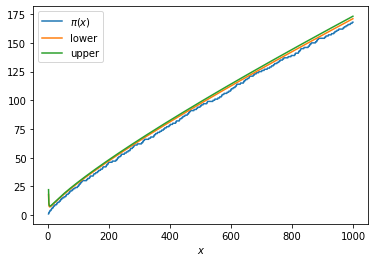

In [3]:
threshold = 0

x = np.arange(threshold + 2, threshold + 1000)
pi = np.array([prime_pi(int(n)) for n in x])

lower = x/np.log(x) + x/np.log(x)**2 + 1.8*x/np.log(x)**3
upper = x/np.log(x) + x/np.log(x)**2 + 2.51*x/np.log(x)**3
plt.plot(x, pi, label=r"$\pi (x)$")
plt.plot(x, lower, label="lower")
plt.plot(x, upper, label="upper")
plt.xlabel(r"$x$")
plt.legend()
plt.savefig("plot2.png")
plt.show()

Clearly Dusart boundaries do not hold for $x \in [0 \ldots 1000]$

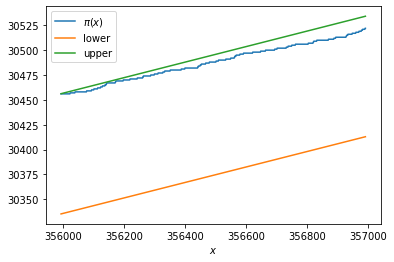

In [4]:
threshold = 355991

x = np.arange(threshold + 2, threshold + 1000)
pi = np.array([prime_pi(int(n)) for n in x])

lower = x/np.log(x) + x/np.log(x)**2 + 1.8*x/np.log(x)**3
upper = x/np.log(x) + x/np.log(x)**2 + 2.51*x/np.log(x)**3
plt.plot(x, pi, label=r"$\pi (x)$")
plt.plot(x, lower, label="lower")
plt.plot(x, upper, label="upper")
plt.xlabel(r"$x$")
plt.legend()
plt.savefig("plot3.png")
plt.show()